In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
# load data
def file_name(number):
    return f"resources/data/exp{number}.csv"

data1_table = np.genfromtxt(file_name(1), delimiter=',', skip_header=1)
data1 = {
    "harmonic": data1_table[:,0],   #harmonic number
    "freq": data1_table[:,1],       # frequency, Hz
    "half freq": data1_table[:,2],  # half-frequency, Hz
}

data2_table = np.genfromtxt(file_name(2), delimiter=',', skip_header=1)
data2 = {
    "harmonic": data2_table[:,0],   #harmonic number
    "mass": data2_table[:,1],       # mass (g)
    "half mass": data2_table[:,2],  # half-mass (g)
}

data3_table = np.genfromtxt(file_name(3), delimiter=',', skip_header=1)
data3 = {
    "harmonic": data3_table[:,0],   #harmonic number
    "length": data3_table[:,1],       # length (cm)
    "half length": data3_table[:,2],  # half-length (cm)
}

# Lab Tier 2 Standing Waves


# Part 1

- Graph the measured resonant frequency vs the harmonic number 𝑛 and perform a fit to the data using equation (5)
- Make sure your graph includes error bar
- Plot the normalized residuals. Are the points randomly distributed?
- What is your measured linear mass density of the string, μexp, including the error associated with it? Do an agreement
test with the theoretical value μth and explain
- Calculate the reduced chi-squared, 𝜒̃ ^2, and comment on the goodness of fit

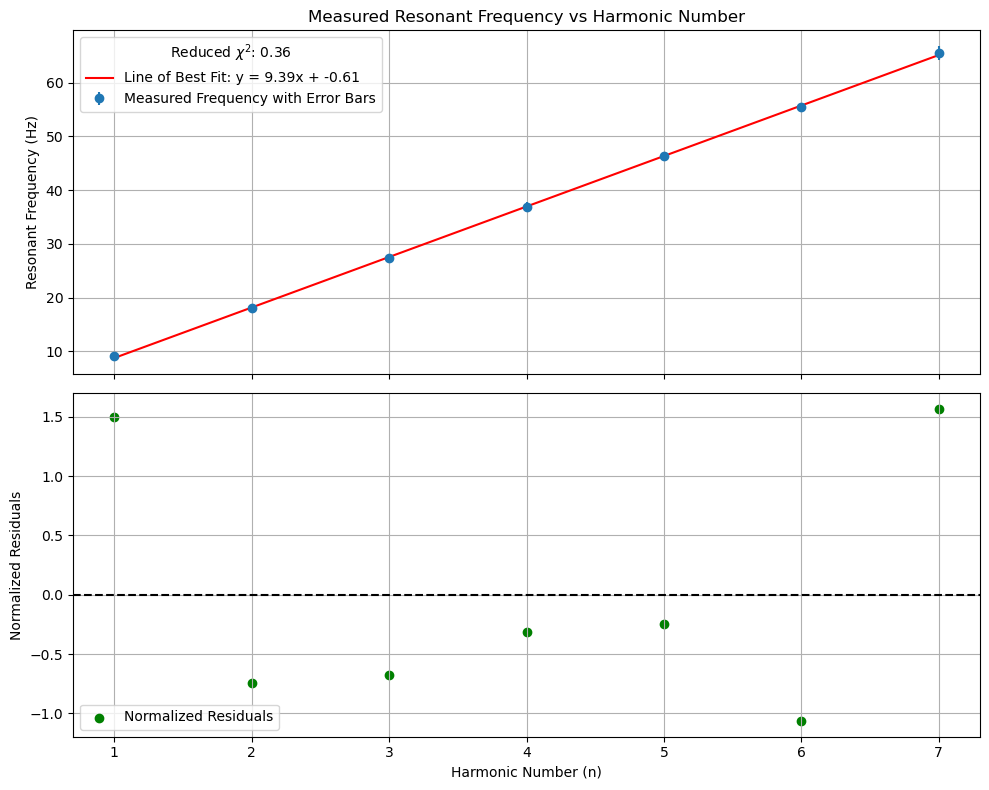

linear mass density (μ) calculated from slope: 0.0043 +- 0.0017 kg/m
linear mass density (μ) theoretical: 0.0045 +- 0.0014 kg/m


In [37]:
def part1():
    harmonic = data1_table[:, 0]
    freq = data1_table[:, 1]
    half_freq = data1_table[:, 2]
    uncertainty = np.abs(freq - half_freq)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    ax1.errorbar(harmonic, freq, yerr=uncertainty, fmt='o', label='Measured Frequency with Error Bars')
    coefficients = np.polyfit(harmonic, freq, 1)
    line_of_best_fit = np.poly1d(coefficients)
    ax1.plot(harmonic, line_of_best_fit(harmonic), label=f'Line of Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')
    ax1.set_title('Measured Resonant Frequency vs Harmonic Number')
    ax1.set_ylabel('Resonant Frequency (Hz)')
    ax1.grid(True)
    
    residuals = freq - line_of_best_fit(harmonic)
    std_residuals = residuals / np.std(residuals)
    
    chi_squared = np.sum((residuals / uncertainty)**2)
    degrees_of_freedom = len(harmonic) - 2
    chi_squared_red = chi_squared / degrees_of_freedom
    ax1.legend(title=f'Reduced $\\chi^2$: {chi_squared_red:.2f}')

    ax2.scatter(harmonic, std_residuals, label='Normalized Residuals', color='green')
    ax2.set_xlabel('Harmonic Number (n)')
    ax2.set_ylabel('Normalized Residuals')
    ax2.grid(True)
    ax2.legend()
    ax2.axhline(y=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

    length = 1
    g = 9.8
    tension = 0.150 * g

    mus = (harmonic**2 * tension) / (4 * freq**2 * length**2)
    mu_exp = np.mean(mus)
    delta_mu_exp = np.sqrt((0.001)**2 + (0.001)**2 + (0.001)**2)

    mu_th = 0.013 / 2.92
    delta_mu_th = np.sqrt((0.001)**2 + (0.001)**2)

    print(f"linear mass density (μ) calculated from slope: {mu_exp:.4f} +- {delta_mu_exp:.4f} kg/m")
    print(f"linear mass density (μ) theoretical: {mu_th:.4f} +- {delta_mu_th:.4f} kg/m")

part1()

# Part 2

[0.01394495]


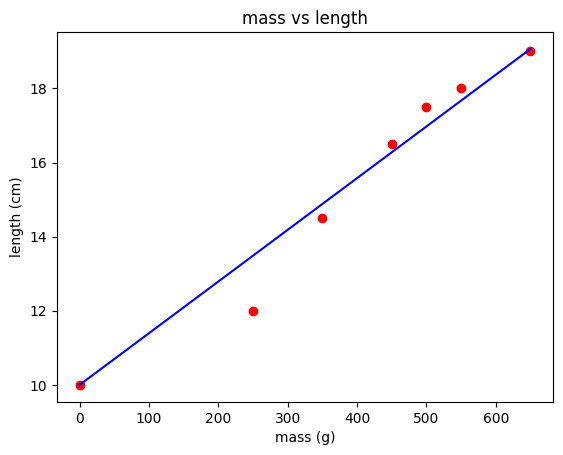

In [3]:
def mu_business():
    mass = [0,
            250,
            350,
            450,
            500,
            550,
            650,
            ] # grams
    length = [10,
              12,
              14.5,
              16.5,
              17.5,
              18,
              19,
              ]# cm
    length_zero = 10
    
    #fit the data to a line
    def line(x, m):
        return m * x + length_zero
    fit, _ = opt.curve_fit(line, mass, length)
    print(fit)
    
    #plot the line
    plt.plot(mass, length, 'ro')
    plt.plot(mass, line(np.array(mass), fit[0]), 'b-')
    plt.xlabel('mass (g)')
    plt.ylabel('length (cm)')
    plt.title('mass vs length')
    plt.show()
    
    #return the slope of the line
    return fit[0]
    
stretch = mu_business()

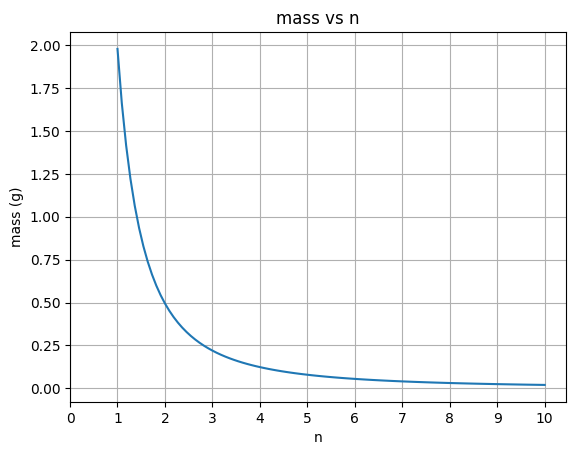

In [25]:
# formula: n = 2fL * sqrt(mu/T)
# T = mass * 9.8
# mu_stretched = mu / ((mass * stretch + 10) / 10)
# given: f = 30, L = 1.1, mu = 4.45e-3
# solve for mass as a function of n using mu_stretched
f = 30
L = 1.1
mu = 4.45e-3
g = 9.8
k = 5000 / stretch

def graphMass():
    n = np.linspace(1, 10, 100)
    def h(n):
        return 4 * mu * f**2 * L**2 / (g * n**2)
    mass = np.sqrt(k**2 + 2 * k * h(n)) - k
    plt.plot(n, mass)
    plt.xticks(np.arange(0, 11, 1))
    plt.grid()
    plt.xlabel('n')
    plt.ylabel('mass (g)')
    plt.title('mass vs n')
    plt.show()
graphMass()

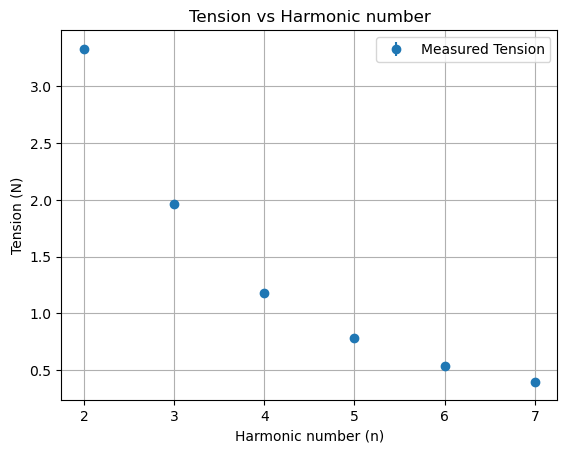

In [33]:
def part2():
    g = 9.8
    harmonic = data2_table[:, 0]
    mass_kg = data2_table[:, 1] / 1000
    half_mass_kg = data2_table[:, 2] / 1000
    tension = mass_kg * g

    uncertainty = np.abs(mass_kg - half_mass_kg)

    # Plotting
    plt.errorbar(harmonic, tension, yerr=uncertainty, fmt='o', label='Measured Tension')
    plt.xlabel('Harmonic number (n)')
    plt.ylabel('Tension (N)')
    plt.title('Tension vs Harmonic number')
    plt.grid(True)
    plt.legend()
    plt.show()
part2()

# Part 3

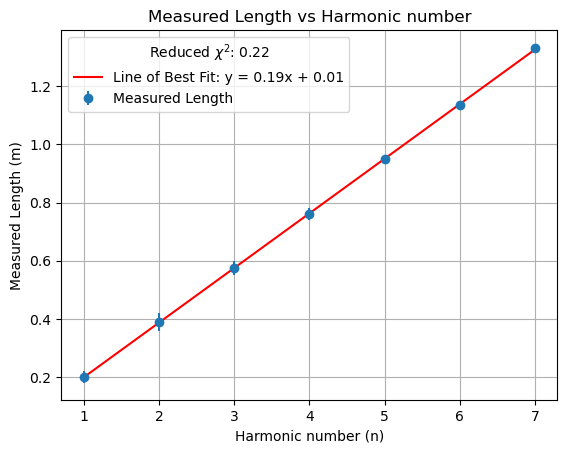

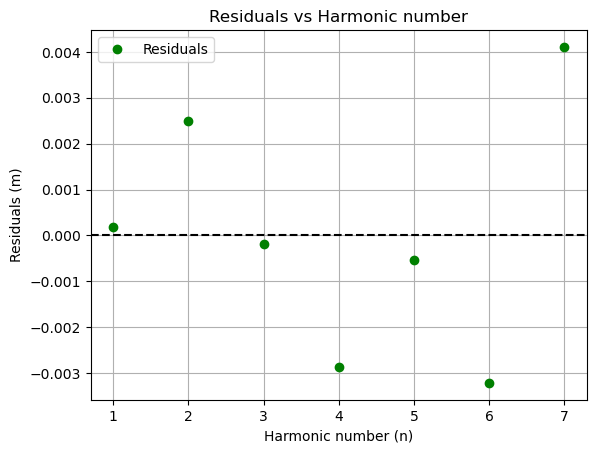

The calculated average linear mass density (μ) is: 0.0040 +- 0.0017 kg/m
linear mass density (μ) theoretical: 0.0045 +- 0.0014 kg/m


In [58]:
def part3():
    # Load data
    harmonic = data3_table[:, 0]
    length_cm = data3_table[:, 1]  # Lengths in centimeters
    half_length_cm = data3_table[:, 2]  # Half lengths in centimeters

    # Convert lengths from centimeters to meters
    length = length_cm / 100
    half_length = half_length_cm / 100

    uncertainty = np.abs(length - half_length)

    # Plot measured length vs harmonic number
    plt.errorbar(harmonic, length, yerr=uncertainty, fmt='o', label='Measured Length')

    # Adding a line of best fit
    coefficients = np.polyfit(harmonic, length, 1)  # Fit a first-degree polynomial (linear fit)
    line_of_best_fit = np.poly1d(coefficients)
    plt.plot(harmonic, line_of_best_fit(harmonic), label=f'Line of Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', color='red')

    # Calculate residuals
    residuals = length - line_of_best_fit(harmonic)

    # Calculate chi-squared and degrees of freedom
    chi_squared = np.sum((residuals / uncertainty)**2)
    degrees_of_freedom = len(harmonic) - 2  # 2 parameters for the line of best fit
    chi_squared_red = chi_squared / degrees_of_freedom

    # Plot settings
    plt.xlabel('Harmonic number (n)')
    plt.ylabel('Measured Length (m)')
    plt.title('Measured Length vs Harmonic number')
    plt.legend(title=f'Reduced $\\chi^2$: {chi_squared_red:.2f}')
    plt.grid(True)
    plt.show()
    
    # Plot residuals
    plt.plot(harmonic, residuals, marker='o', linestyle='', color='green', label='Residuals')
    plt.xlabel('Harmonic number (n)')
    plt.ylabel('Residuals (m)')
    plt.title('Residuals vs Harmonic number')
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')  # Adding a horizontal line at y=0 for reference
    plt.legend()
    plt.show()

    # Given values
    f = 50  # Frequency in Hz
    m = 0.15  # Mass in kg
    g = 9.81  # Acceleration due to gravity in m/s²
    T = m * g  # Tension

    # Calculate mu for each data point
    mus = ((harmonic / (2 * f * length))**2) * T

    # Calculate mean mu and its uncertainty
    mu_calculated = np.mean(mus)
    delta_mu_calc = np.sqrt((0.001)**2 + (0.001)**2 + (0.001)**2)

    # Theoretical value and its uncertainty
    mu_th = 0.013 / 2.92
    delta_mu_th = np.sqrt((0.001)**2 + (0.001)**2)

    print(f"The calculated average linear mass density (μ) is: {mu_calculated:.4f} +- {delta_mu_calc:.4f} kg/m")
    print(f"linear mass density (μ) theoretical: {mu_th:.4f} +- {delta_mu_th:.4f} kg/m")

part3()